In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split


In [ ]:
# from tensorflow.keras.preprocessing.text import one_hot
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding
# from tensorflow.keras.layers import LSTM
# from tensorflow.keras.layers import Dense


In [90]:
df = pd.read_csv('../customer_booking/filtered_customer_booking.csv', index_col=0)
df= df.reset_index(drop=True)

In [93]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49960,2,Internet,RoundTrip,27,6,9,6,Australia,1,0,1,5.62,0
49961,1,Internet,RoundTrip,111,6,4,7,Australia,0,0,0,5.62,0
49962,1,Internet,RoundTrip,24,6,22,6,Australia,0,0,1,5.62,0
49963,1,Internet,RoundTrip,15,6,11,1,Australia,1,0,1,5.62,0


In [99]:
del df['booking_origin']

In [27]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
encoder = OneHotEncoder(handle_unknown='ignore')

In [94]:
# one hot encode sales channel
sales_encoded = pd.DataFrame(encoder.fit_transform(df[['sales_channel']]).toarray())
sales_encoded = sales_encoded.rename(columns={0: 'internet', 1: 'mobile'})
df = df.join(sales_encoded)

# one hot encode trip type
triptype_encoded = pd.DataFrame(encoder.fit_transform(df[['trip_type']]).toarray())
triptype_encoded = triptype_encoded.rename(columns={0: 'circle_trip', 1: 'one_way', 2:'round_trip'})
df = df.join(triptype_encoded)

In [51]:
df.trip_type.value_counts()

trip_type
RoundTrip     49462
OneWay          387
CircleTrip      116
Name: count, dtype: int64

In [95]:
# drop categorical columns
df.drop(['sales_channel', 'trip_type'], axis=1, inplace=True)

In [ ]:
# store the target variable
y_label = df.booking_complete
# remove the target column
del df['booking_complete']

In [97]:
df.shape

(49965, 15)

<Axes: >

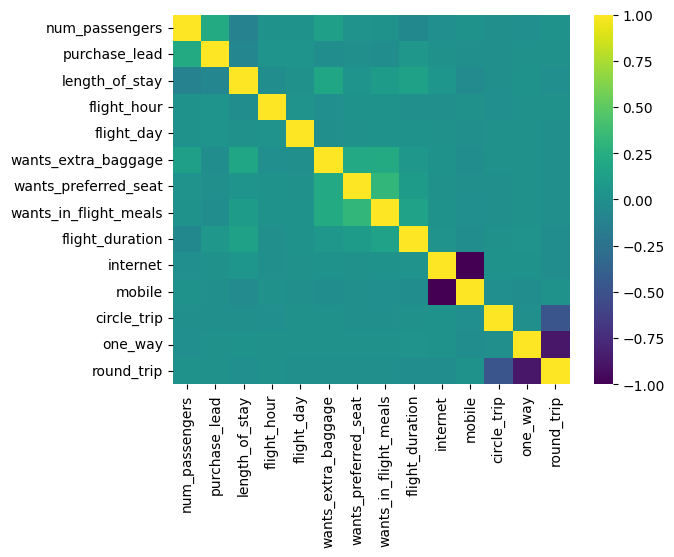

In [ ]:
df_corr = df.corr()
sns.heatmap(df_corr, cmap='viridis' )

##### Normalize the Values

In [76]:
from sklearn.preprocessing import StandardScaler

In [100]:
# an instance of standard scaler
scaler = StandardScaler()

# scale the values
scaled_df = scaler.fit_transform(df)

In [102]:
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
# add the target variable back to the dataframe
scaled_df['label'] = y_label

In [104]:
scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,internet,mobile,circle_trip,one_way,round_trip,label
0,0.400583,1.970982,-0.119164,-0.381593,1.096786,0.703607,-0.649993,-0.863460,-1.173844,0.355818,-0.355818,-0.048239,-0.088351,0.100844,0
1,-0.579494,0.302877,-0.088395,-1.120633,1.096786,-1.421248,-0.649993,-0.863460,-1.173844,0.355818,-0.355818,-0.048239,-0.088351,0.100844,0
2,0.400583,1.759689,-0.026857,1.466006,-0.408692,0.703607,1.538478,-0.863460,-1.173844,0.355818,-0.355818,-0.048239,-0.088351,0.100844,0
3,-0.579494,0.124946,0.250066,-0.935873,1.096786,-1.421248,-0.649993,1.158131,-1.173844,0.355818,-0.355818,-0.048239,-0.088351,0.100844,0
4,0.400583,-0.186434,-0.026857,1.096486,-0.408692,0.703607,-0.649993,1.158131,-1.173844,0.355818,-0.355818,-0.048239,-0.088351,0.100844,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49960,0.400583,-0.642382,-0.519164,-0.012073,1.096786,0.703607,-0.649993,1.158131,-1.107035,0.355818,-0.355818,-0.048239,-0.088351,0.100844,0
49961,-0.579494,0.291756,-0.519164,-0.935873,1.598612,-1.421248,-0.649993,-0.863460,-1.107035,0.355818,-0.355818,-0.048239,-0.088351,0.100844,0
49962,-0.579494,-0.675745,-0.519164,2.389806,1.096786,-1.421248,-0.649993,1.158131,-1.107035,0.355818,-0.355818,-0.048239,-0.088351,0.100844,0
49963,-0.579494,-0.775831,-0.519164,0.357447,-1.412345,0.703607,-0.649993,1.158131,-1.107035,0.355818,-0.355818,-0.048239,-0.088351,0.100844,0


In [82]:
# split the data
from sklearn.model_selection import train_test_split


In [151]:
X = scaled_df.iloc[:, :-1]
y = y_label

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.33, random_state=42)

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.inspection import permutation_importance

from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

In [118]:
"""
    Create functions to fit and predict the values of whether customer would complete the booking.
    and functions with metrics to evaluate the model prediction.

"""

def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

In [152]:
#  Random Forest Classifier
rfc = RandomForestClassifier(max_depth=50, min_samples_split=5, random_state=1)


In [153]:
model_predict = model_fit_predict(rfc, X_train, y_train, X_train)

In [154]:
#f1 score for training data
f1 = round(f1_score(y_train, model_predict),2) 

#accuracy score for training data
acc = round(accuracy_score(y_train, model_predict),2) 

#precision score for training data
pre = round(precision_score(y_train, model_predict),2)

print(f"f1 score: {f1}, Accuracy score: {acc}, Precision: {pre}")

f1 score: 0.72, Accuracy score: 0.93, Precision: 1.0


In [155]:
confusion_matrix(y_train, model_predict)

array([[28522,     2],
       [ 2193,  2759]], dtype=int64)

<Axes: >

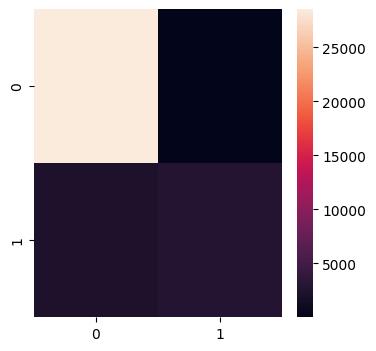

In [156]:
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_train, model_predict))

##### prediction for Testing data

In [143]:
rfc = RandomForestClassifier(max_depth=50, min_samples_split=5, random_state=1)

model_test_predict = model_fit_predict(rfc, X_test, y_test, X_test)


In [144]:
#f1 score for training data
f1 = round(f1_score(y_test, model_test_predict),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, model_test_predict),2) 

#precision score for training data
pre = round(precision_score(y_test, model_test_predict),2)

print(f"Test Data: \n f1 score: {f1}, Accuracy score: {acc}, Precision: {pre}")

Test Data: 
 f1 score: 0.73, Accuracy score: 0.94, Precision: 1.0


Over fitting is occuring in the data, this is caused largely due to an unbalanced dataset, to deal with this, reduce the number od entries 0 to a level almost equal to 1

In [169]:
scaled_df.label.value_counts()

label
0    42493
1     7472
Name: count, dtype: int64

Text(0.5, 0, 'random forest feature importance')

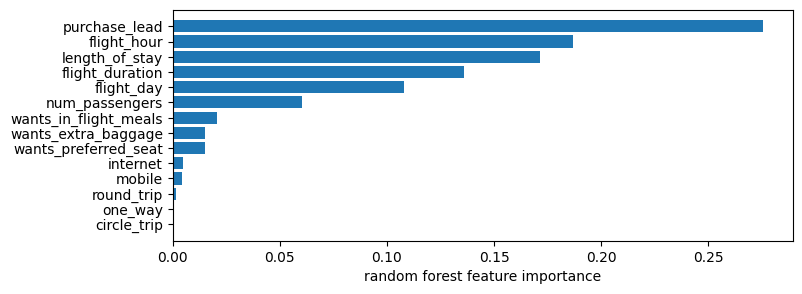

In [168]:
plt.figure(figsize=(8,3))
sort_idx = rfc.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:, :-1].columns[sort_idx], rfc.feature_importances_[sort_idx])
plt.xlabel('random forest feature importance')

In [183]:
# create data sample with 8000 samples of target = 0
scaled_df_0 = scaled_df[scaled_df.label == 0].sample(n=8000)

# join the two data sets into a dataframe
scaled_df_new =pd.concat([scaled_df[scaled_df['label']== 1], scaled_df_0], ignore_index=True)

In [187]:
scaled_df_new = scaled_df_new.sample(frac = 1).reset_index(drop=True)

In [198]:
rfc = RandomForestClassifier(n_estimators=50,max_depth=50, min_samples_split=5, random_state=1)
X = scaled_df_new.iloc[:, :-1]
y= scaled_df_new.label

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.33, random_state=42)

In [199]:
model_predict_new = model_fit_predict(rfc, X_train, y_train, X_test)


In [200]:
#f1 score for training data
f1 = round(f1_score(y_test, model_predict_new),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, model_predict_new),2) 

#precision score for training data
pre = round(precision_score(y_test, model_predict_new),2)

print(f"Test Data: \n f1 score: {f1}, Accuracy score: {acc}, Precision: {pre}")

Test Data: 
 f1 score: 0.6, Accuracy score: 0.61, Precision: 0.6


In [201]:
from sklearn.metrics import roc_auc_score

In [203]:
roc_score = roc_auc_score(y_test, model_predict_new)

0.6140510678281043

Xgboost can be used to fine tune the model and improve the roc_auc score

In [ ]:
# count the longest list in the dataset

def longest_list(lst_of_lsts):
    max_len = 0
    longest_lst = None
    for lst in lst_of_lsts:
        if len(lst) > max_len:
            max_len = len(lst)
            # longest_lst = lst
    return max_len